### Import drive library and mount the drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import general libraies used in project

In [2]:
import numpy as np
import pandas as pd
import cv2
import tensorflow

import matplotlib.pyplot as plt
%matplotlib inline

### Load the image galery

In [3]:
psData = np.load('/content/drive/My Drive/MLAI/PSProject/images.npy')

Show the data shape (4750 images, 128 by 128 pixels and 3 channels RGB)

In [4]:
psData.shape

(4750, 128, 128, 3)

### Load the correspondent label for each image

In [5]:
psLabels = pd.read_csv('/content/drive/My Drive/MLAI/PSProject/Labels.csv')


Shows the data shape of the labels (4750 labels, 1 for each image)

In [6]:
psLabels.shape

(4750, 1)

Shows how many items for each class 

In [7]:
psLabels.Label.value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: Label, dtype: int64

In [8]:
def showLabelCategory(category):
    if category >= 0:
        if category < encodedabels.shape[0]:
            return le.classes_[encodedabels[category]]

In [9]:
def filterGaussImages(imgs):
    newImgs = []
    for img in imgs:
        gaus = cv2.GaussianBlur(img, (5, 5), 0)
        newImgs.append(gaus)
    arr = np.array(newImgs)
    return arr

In [10]:
def showMyImage_ByIndex(image, indx, h = 7, w = 7, f = 1):
    fig = plt.figure(f, figsize=(h, w))
    if indx >= 0:
        if indx < psLabels.shape[0]:
            fig = plt.figure(f, figsize=(h, w))
            imagex = image[indx]
            label = showLabelCategory(indx)
            labels = 'Label: ' + label + ' --- Class: ' + str(encodedabels[indx])
            plt.imshow(imagex)
            fig.text(1, .5, labels)
            return
    print('Image index out of range')

In [11]:
def showMyImage_ByCat(image, iCat, h = 7, w = 7, f = 1):
    fig = plt.figure(f, figsize=(h, w))
    if iCat >= 0:
        if iCat < psLabels.shape[0]:
            indx = np.where(encodedabels == iCat)[0][0]
            imagex = image[indx]
            label = showLabelCategory(indx)
            labels = 'Label: '+label+'   ---  Index i: '+ str(indx) + ' --- Class: ' + str(encodedabels[indx])
            plt.imshow(imagex)
            fig.text(1, .5, labels)
            return
    print('Image index out of range')

### Label Hot Encoding

In [12]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

psTypes = psLabels.Label.unique()
le = preprocessing.LabelEncoder()
le.fit(psTypes)
encodedabels = le.transform(psLabels)

print(str(le.classes_))

['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


## Visualizing data (images) before pre-processing

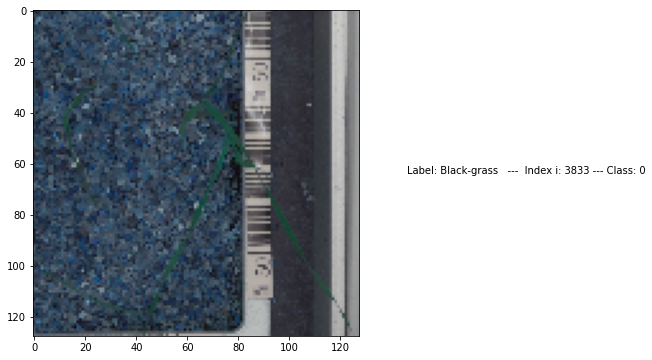

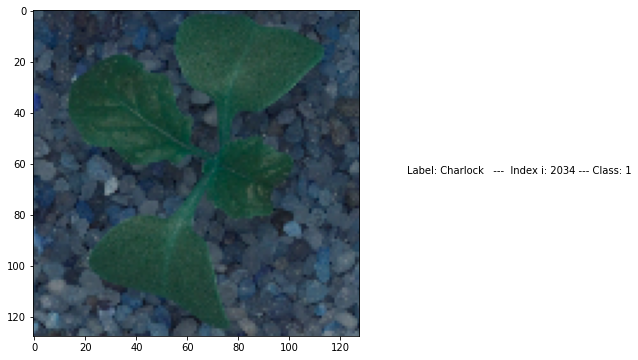

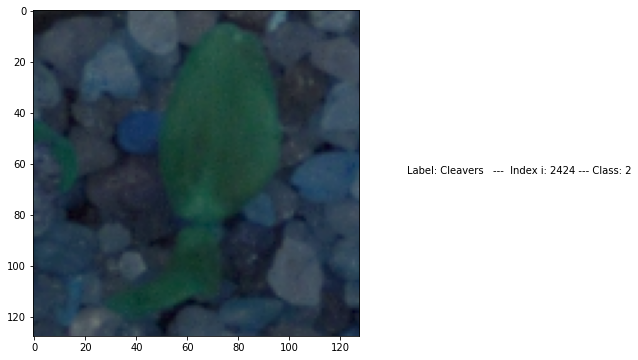

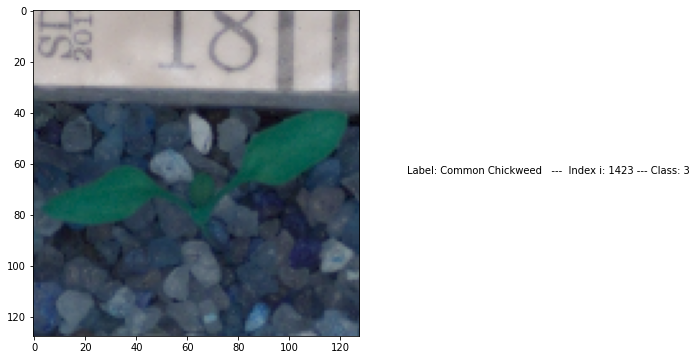

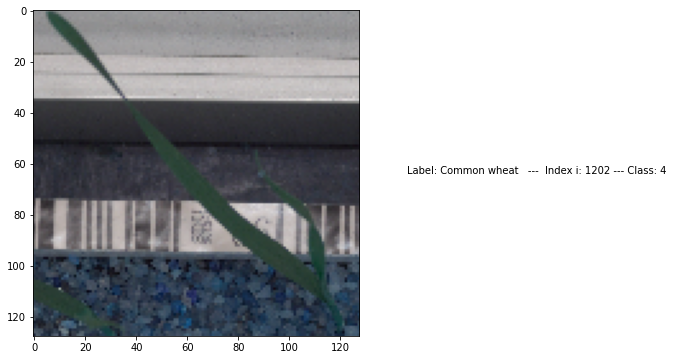

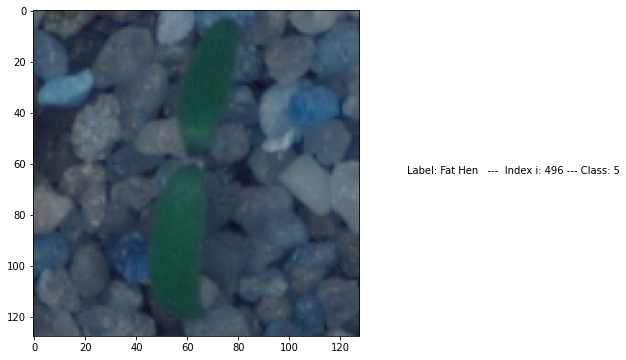

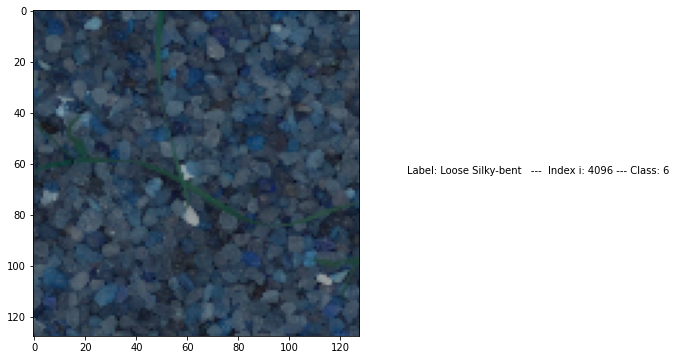

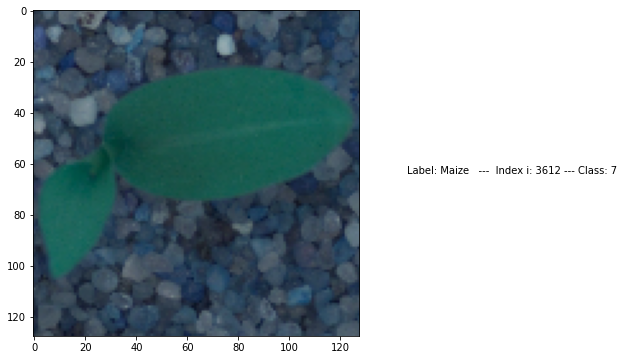

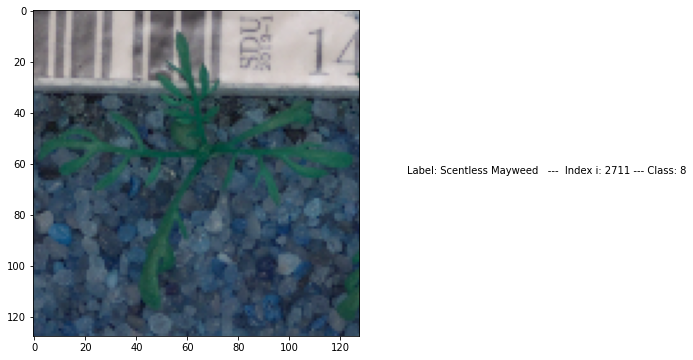

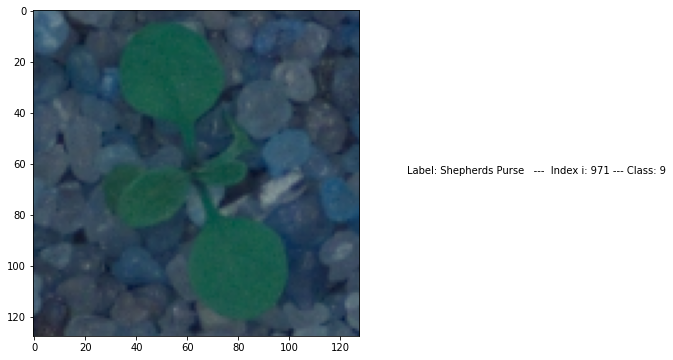

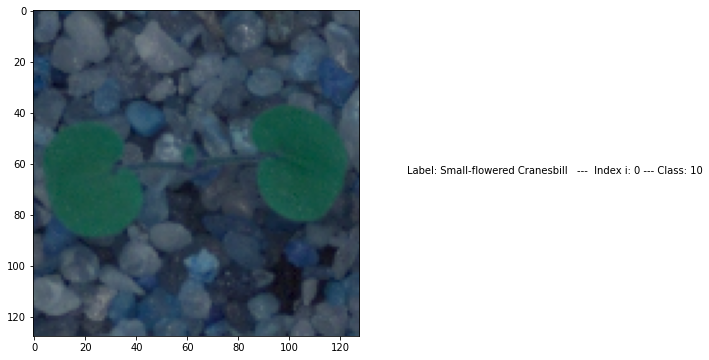

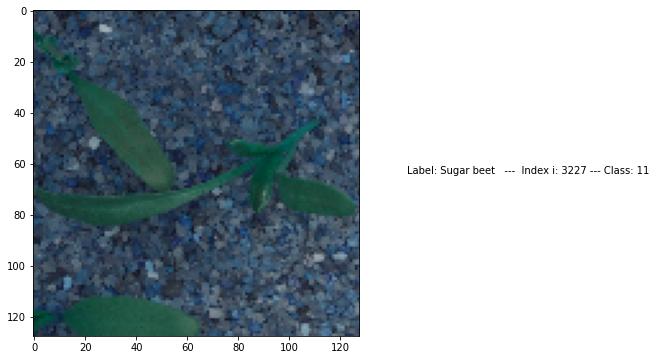

In [13]:
#Shows one image (original) of each category  
for i in range(0, len(le.classes_)):
    showMyImage_ByCat(psData, i, 6, 6, i)

### Applying Gaussian Filter to data (original  images)

In [14]:
gaussImgs = filterGaussImages(psData)

## Visualizing data (images) after processing with Gaussian Filter

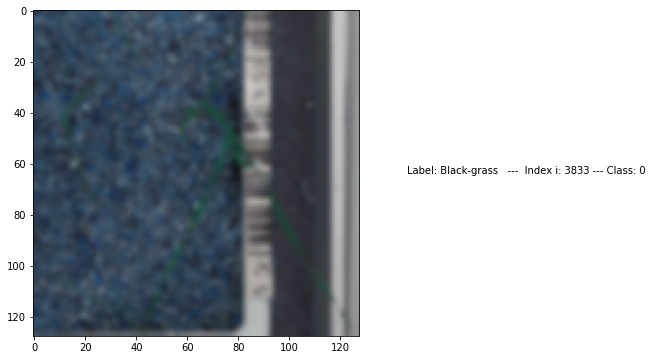

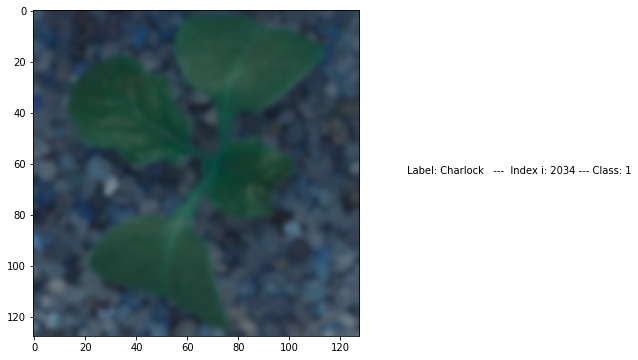

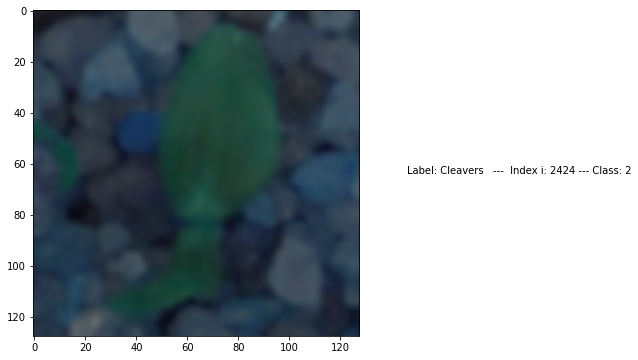

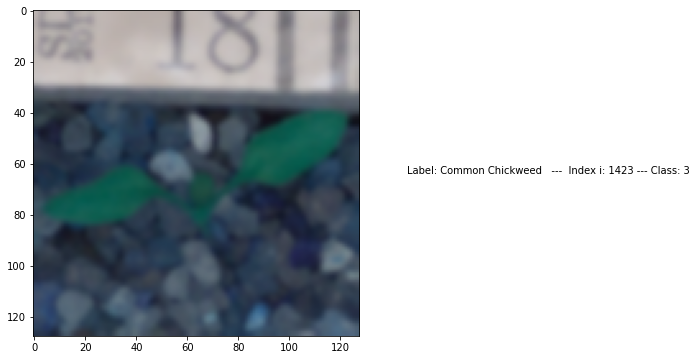

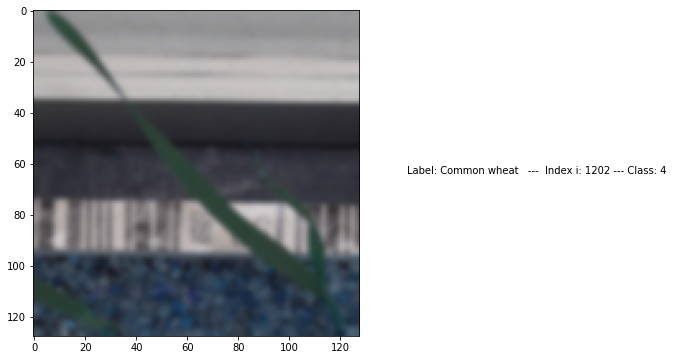

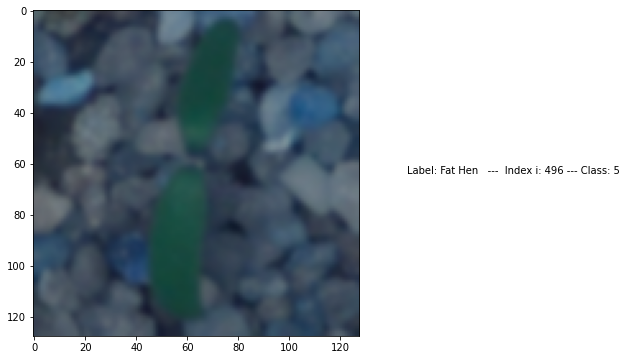

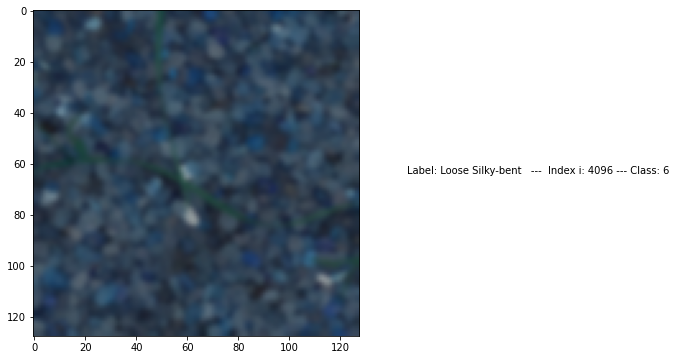

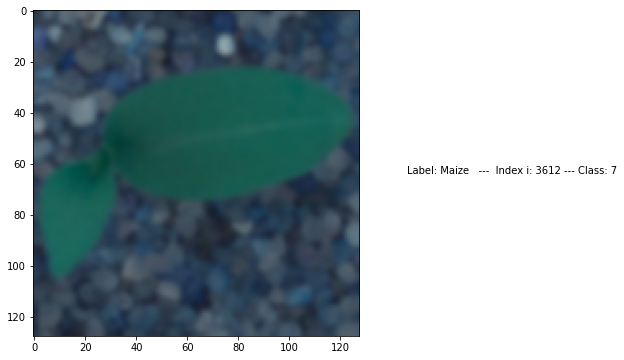

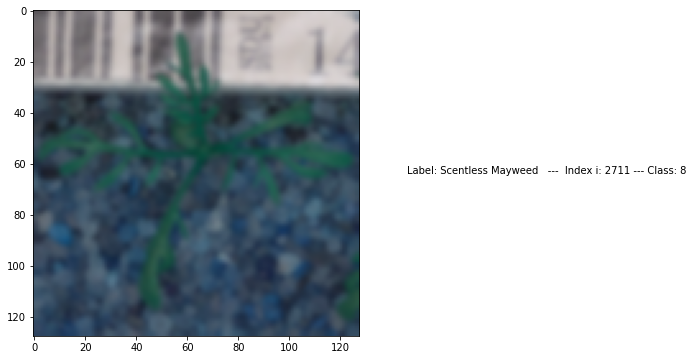

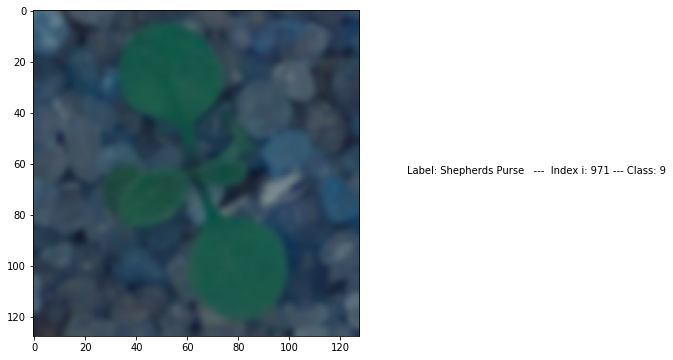

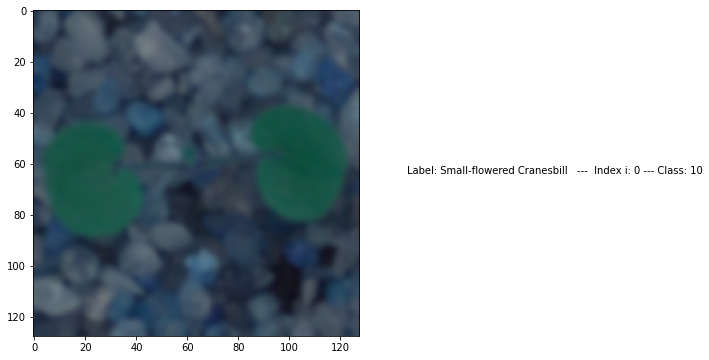

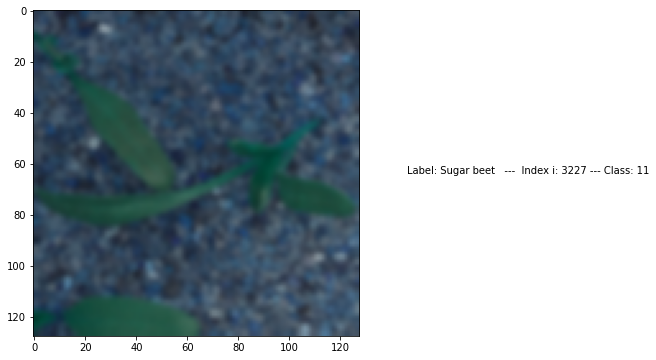

In [15]:
#Show one image (Gaussian filtered) of each category  
for i in range(0, len(le.classes_)):
    showMyImage_ByCat(gaussImgs, i, 6, 6, i)

## Data Processing

In [16]:
ylabels = tensorflow.keras.utils.to_categorical(encodedabels)

## Data nomalization

In [17]:
#Converting filtered images from integer to float32
gaussImgs = gaussImgs.astype('float32')
#Normalizing filtered images
gaussImgs = gaussImgs / 255

## Split data into train, validation and test sets

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(gaussImgs, ylabels, test_size = 0.3, random_state = 27)
xval, xtest, yval, ytest     = train_test_split(xtest, ytest, test_size = 0.5, random_state = 27 )

### Show the label class for ytrain[0]

In [19]:
print(showLabelCategory((np.argmax(ytrain[0]))))

Small-flowered Cranesbill


### Shows the type and shape for train, validation and test sets

In [20]:
print('xtrain type:', type(xtrain),' shape: ', xtrain.shape)
print('ytrain type:', type(ytrain),' shape: ', ytrain.shape)
print('\n')
print('x_test type:', type(xtest),' shape: ', xtest.shape)
print('ytest  type:',  type(ytest),' shape :', ytest.shape)
print('\n')
print('x_val  type:',  type(xval),' shape: ', xval.shape)
print('y_val  type:',  type(yval),' shape :', yval.shape)


xtrain type: <class 'numpy.ndarray'>  shape:  (3325, 128, 128, 3)
ytrain type: <class 'numpy.ndarray'>  shape:  (3325, 12)


x_test type: <class 'numpy.ndarray'>  shape:  (713, 128, 128, 3)
ytest  type: <class 'numpy.ndarray'>  shape : (713, 12)


x_val  type: <class 'numpy.ndarray'>  shape:  (712, 128, 128, 3)
y_val  type: <class 'numpy.ndarray'>  shape : (712, 12)


## Import libraries for CNN

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

### Buidign the CNN


### Define a sequential model 

In [22]:
model = Sequential()

model.add(Conv2D(32,(3,3), padding='same', input_shape=xtrain.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(12))
model.add(Activation('softmax'))

## Buid the CNN model (using Loss = Categorical Cross Entropy and Adam Optimizer)


### and show the summary of it

In [23]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        1

### Train the model

In [24]:
history = model.fit(xtrain, ytrain, 
                    batch_size = 128, epochs = 15, 
                    validation_data=(xval, yval), 
                    shuffle = True, 
                    verbose=1)

Epoch 1/15
26/26 [==============================] - 7s 265ms/step - loss: 2.4294 - accuracy: 0.1377 - val_loss: 2.4214 - val_accuracy: 0.1503
Epoch 2/15
26/26 [==============================] - 5s 191ms/step - loss: 2.2982 - accuracy: 0.2340 - val_loss: 2.1731 - val_accuracy: 0.2963
Epoch 3/15
26/26 [==============================] - 5s 193ms/step - loss: 1.9320 - accuracy: 0.3507 - val_loss: 1.8013 - val_accuracy: 0.4129
Epoch 4/15
26/26 [==============================] - 5s 193ms/step - loss: 1.6065 - accuracy: 0.4550 - val_loss: 1.5317 - val_accuracy: 0.5014
Epoch 5/15
26/26 [==============================] - 5s 188ms/step - loss: 1.3906 - accuracy: 0.5257 - val_loss: 1.3644 - val_accuracy: 0.5379
Epoch 6/15
26/26 [==============================] - 5s 192ms/step - loss: 1.2487 - accuracy: 0.5862 - val_loss: 1.2388 - val_accuracy: 0.5801
Epoch 7/15
26/26 [==============================] - 5s 192ms/step - loss: 1.1429 - accuracy: 0.6241 - val_loss: 1.1768 - val_accuracy: 0.6025
Epoch 

### Visualize the performace of the model on each Epoch

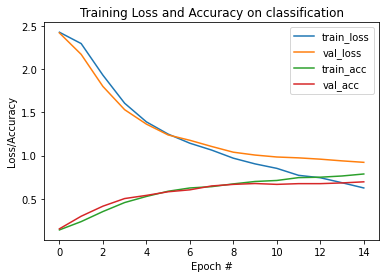

In [25]:
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.plot(history.history['accuracy'], label="train_acc")
plt.plot(history.history['val_accuracy'], label="val_acc")
plt.title('Training Loss and Accuracy on classification')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

## Evaluate the model

In [26]:
Ypred = model.predict(xval)
Ypred = np.argmax(Ypred,axis = 1)
Ytrue = np.argmax(yval,axis = 1)

In [27]:
score = model.evaluate(xtest, ytest, verbose=0, batch_size = 38)
print(' Accuracy {:02.2f}%'.format(score[1]*100))
print(' Loss {:02.2f}%'.format(score[0]*100))

 Accuracy 71.53%
 Loss 92.36%


## Visualize the confusion matrix

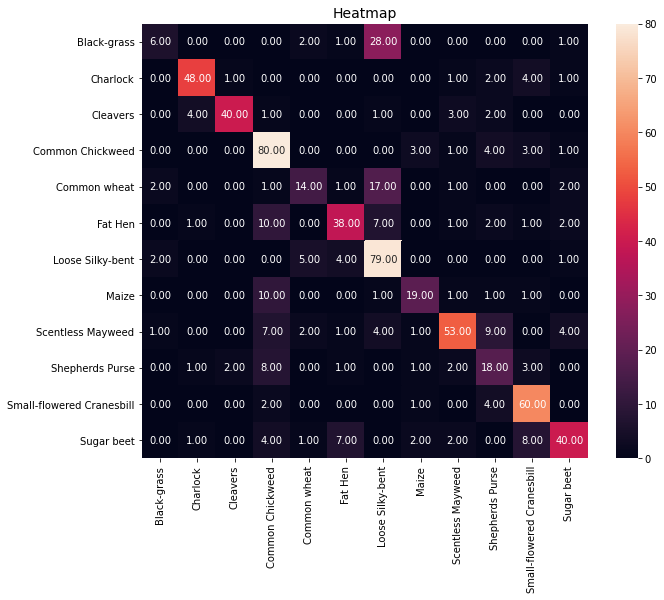

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Ytrue, Ypred)
fig = plt.figure(1, figsize=(10, 8))
plt.title('Heatmap', fontsize=14)
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=le.classes_, yticklabels=le.classes_);


### Visualize predictions for:


1.   xtest[2]
2.   xtest[3]
3.   xtest[33]
4.   xtest[36]
5.   xtest[59]

#### Creates a tensor with all requested predictions

In [29]:
preds = tensorflow.stack([
  tensorflow.convert_to_tensor(xtest[2]),
  tensorflow.convert_to_tensor(xtest[3]),
  tensorflow.convert_to_tensor(xtest[33]),
  tensorflow.convert_to_tensor(xtest[36]),
  tensorflow.convert_to_tensor(xtest[59])])

#### Make the actual predictions

In [30]:
YPredTest2 = model.predict(preds)

### Decode the results to identify their classes

In [31]:
YPredTest2 = np.argmax(YPredTest2,axis = 1)

### Shows the array of predictions

In [32]:
YPredTest2

array([11, 11,  2,  2,  3])

### Visualize the predictions with its label class

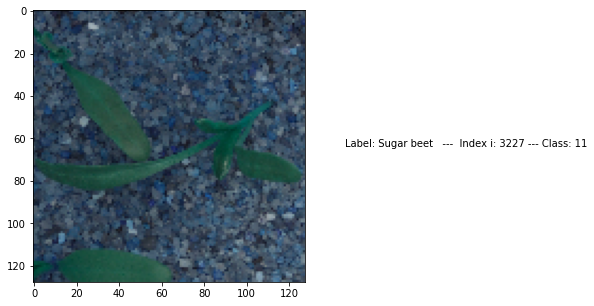

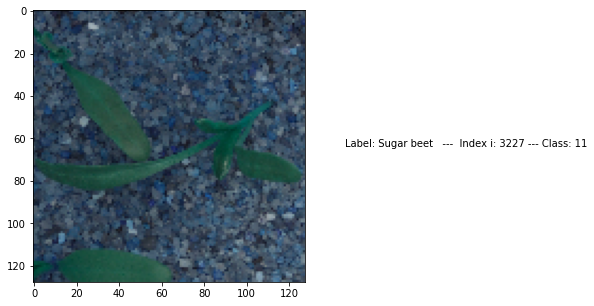

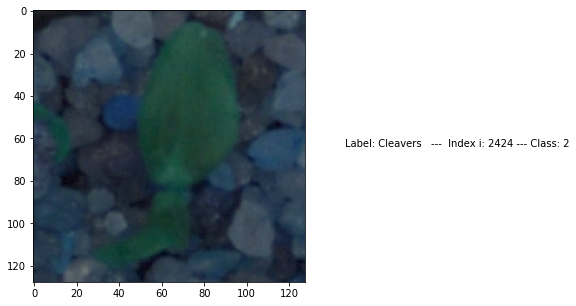

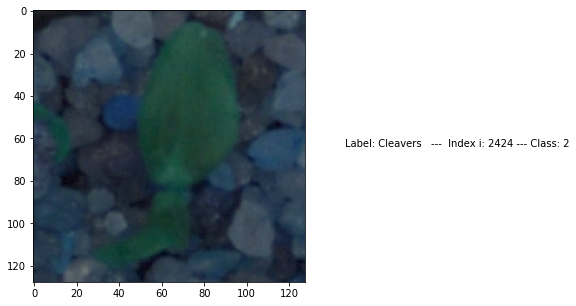

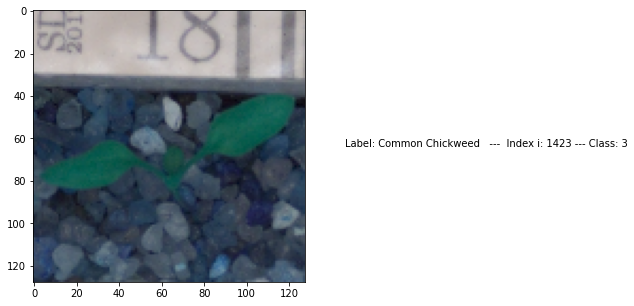

In [34]:
a = 0
for i in YPredTest2:
  a = a + 1
  showMyImage_ByCat(psData, i, 5, 5, a)